<a href="https://colab.research.google.com/github/AprovanLabs/data-science/blob/main/notebooks/onkia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- notebooks/examples -->

<table>
  <tr width="500">
    <td width="15"></td>
    <td width="180" height="200">
        <a href="https://github.com/AprovanLabs">
          <img width="150" src="https://raw.githubusercontent.com/AprovanLabs/aprovan.com/main/docs/assets/logo-labs.png" alt="Aprovan" />
        </a>
    </td>
    <td width="300">
        <pre>Aprovan Labs / data-science</pre>
        <br />
        <a href="https://aprovan.com">aprovan.com</a> &middot; <a href="https://docs.aprovan.com">docs.aprovan.com</a>
        </br>
        </br>
        <a href="https://github.com/AprovanLabs/data-science">
            <img height="20" src="https://img.shields.io/badge/-AprovanLabs-e4405f?style=flat-square&logo=GitHub&logoColor=white&link=https://github.com/AprovanLabs/" alt="Aprovan Labs GitHub" />
        </a>
        <a href="https://www.linkedin.com/company/aprovan">
            <img height="20" src="https://img.shields.io/badge/-Aprovan-blue?style=flat-square&logo=Linkedin&logoColor=white&link=https://www.linkedin.com/company/aprovan)" alt="Aprovan LinkedIn">
        </a>
    </td>
    <td width="200"></td>
  </tr>
</table>

# Onkia, *Fish On!*


In [1]:
%matplotlib inline
%pip install seaborn

## Load Dataset

In [2]:
lake_name = input("Lake name: ")

Lake name: Clearwater


In [3]:
from typing import Any, Dict, List, Literal, Optional, Union


class SurveyOverview:
    littoral_acres: float
    accesses: List["Access"]
    mean_depth_feet: float
    max_depth_feet: int
    area_acres: float
    lake_name: Literal["Clearwater"]
    average_water_clarity: float
    surveys: List["Survey_1C"]
    dow_number: int
    shore_length_miles: float
    sampled_plants: List[Any]
    water_clarity: List[List[Union[float, str]]]
    office_code: Literal["F315"]


class Access:
    lake_access_comments: Literal[" "]
    location: Literal[""]
    owner_type_id: Literal["DNR", "PRI"]
    public_use_auth_code: Literal["OPEN", "PRMIT"]
    access_type_id: Literal["CO"]


class Survey:
    survey_sub_type: str
    lengths: Union["Length", Dict[str, Any]]
    survey_type: Literal["Standard Survey", "Targeted Survey"]
    survey_date: str
    narrative: str
    survey_id: int
    fish_catch_summaries: List["FishCatchSummary"]
    header_info: List[Optional[str]]


class Length:
    wae: Optional["Limit"]
    blg: Optional["Limit"]
    blb: Optional["Limit"]
    pmk: Optional["Limit"]
    yeb: Optional["Limit"]
    gsf: Optional["Limit"]
    cap: Optional["Limit"]
    tlc: Optional["Limit"]
    yep: Optional["Limit"]
    bof: Optional["Limit"]
    lmb: Optional["Limit"]
    hsf: Optional["Limit"]
    blc: Optional["Limit"]
    brb: Optional["Limit"]
    rkb: Optional["Limit"]
    nop: Optional["Limit"]
    gos: Optional["Limit"]
    wts: Optional["Limit"]


class FishCatchSummary:
    quartile_count: str
    cpue: float
    species: str
    total_catch: int
    total_weight: float
    quartile_weight: str
    gear: str
    average_weight: float
    gear_count: float


class Limit:
    fish_count: List[List[int]]
    maximum_length: int
    minimum_length: int


In [4]:
class Lake:
    morphology: "Morphology"
    border: Literal[""]
    county_id: int
    fish_species: List[str]
    notes: Literal[""]
    special_fishing_regs: List["SpecialFishingReg"]
    bbox: "Bbox"
    apr_ids: List[int]
    point: "Bbox"
    county: Literal["Wright"]
    mapid: List[Literal["C0779"]]
    name: Literal["Clearwater"]
    resources: "Resource"
    nearest_town: Literal["Annandale"]
    id_: int
    invasive_species: List[str]


class Morphology:
    area: float
    max_depth: int
    mean_depth: float
    shore_length: float
    littoral_area: float


class SpecialFishingReg:
    location: str
    loc_display_type: int
    regs: List["Reg"]


class Reg:
    species: List[Literal["Crappie", "Sunfish"]]
    text: Literal["Daily limit five.", "Daily limit ten."]


class Resource:
    lake_health: int
    ice_out: int
    fca: int
    water_levels: int
    water_access: int
    water_quality: int
    sentinel_lake: int
    ice_in: int
    lake_map: int
    special_fishing_regs: int
    lake_survey: int
    fish_stocking: int


class Bbox:
    epsg4326: List[float]
    epsg26915: List[int]


In [5]:
import io
import csv

def csv_to_dict(data: str, delimiter: str = ",") -> dict:
  csvio = io.StringIO(data, newline="")
  return list(csv.DictReader(csvio, delimiter=delimiter))


In [6]:
# See http://www.fishing.info/water_temp.html
WATER_TEMP_PREFERENCES = """Species	Lower Avoidance	Optimum	Upper Avoidance
Atlantic Salmon	45	50-62	N/A
Black Crappie	60	71	75
Bluegills	58	69-72	80
Blue Catfish	N/A	77-82	N/A
Brook Trout	44	58	70
Brown Bullhead	65	78-82	85
Brown Trout	44	56-66	75
Burbot	N/A	52	N/A
Channel Catfish	55	82-89	90+
Chinook Salmon	44	55	60
Coho Salmon	44	55	60
Flathead Catfish	81	85	90
Grayling	N/A	N/A	65
Lake Trout	40	50-55	60
Largemouth Bass	50	65-75	85
Muskellunge	55	63-67	78
Northern Pike	55	65	74
Pumpkinseed	N/A	81	N/A
Rainbow Trout	44	61	75
Rock Bass	N/A	70	N/A
Smallmouth Bass	60	65-70	73
Splake	42	50-66	68
Steelhead Trout	38	55-60	N/A
Sunfish	50	58	68
Walleye	50	64-70	76
White Bass	55	65-70	80
White Catfish	N/A	80-85	N/A
White Crappie	N/A	61	N/A
White Perch	N/A	89	N/A
Yellow Perch	58	68	75"""

ideal_water_temps = csv_to_dict(WATER_TEMP_PREFERENCES, delimiter="\t")
ideal_water_temps

[{'Species': 'Atlantic Salmon',
  'Lower Avoidance': '45',
  'Optimum': '50-62',
  'Upper Avoidance': 'N/A'},
 {'Species': 'Black Crappie',
  'Lower Avoidance': '60',
  'Optimum': '71',
  'Upper Avoidance': '75'},
 {'Species': 'Bluegills',
  'Lower Avoidance': '58',
  'Optimum': '69-72',
  'Upper Avoidance': '80'},
 {'Species': 'Blue Catfish',
  'Lower Avoidance': 'N/A',
  'Optimum': '77-82',
  'Upper Avoidance': 'N/A'},
 {'Species': 'Brook Trout',
  'Lower Avoidance': '44',
  'Optimum': '58',
  'Upper Avoidance': '70'},
 {'Species': 'Brown Bullhead',
  'Lower Avoidance': '65',
  'Optimum': '78-82',
  'Upper Avoidance': '85'},
 {'Species': 'Brown Trout',
  'Lower Avoidance': '44',
  'Optimum': '56-66',
  'Upper Avoidance': '75'},
 {'Species': 'Burbot',
  'Lower Avoidance': 'N/A',
  'Optimum': '52',
  'Upper Avoidance': 'N/A'},
 {'Species': 'Channel Catfish',
  'Lower Avoidance': '55',
  'Optimum': '82-89',
  'Upper Avoidance': '90+'},
 {'Species': 'Chinook Salmon',
  'Lower Avoidance':

In [7]:
import logging
from typing import Optional, Mapping, Protocol
import requests
import xml.etree.ElementTree as ET


class LakeTopographyService(Protocol):
  def get_lake_by_name_and_county(
      self,
      name: str,
      county: int,
  ):
    pass


class MnDnrLakeTopographyService(LakeTopographyService):
  __API_BY_NAME_AND_COUNTY = "http://services.dnr.state.mn.us/api/lakefinder/by_name/v1"
  __API_MAP_HOST = "https://maps2.dnr.state.mn.us/cgi-bin/lakefinder/detail.cgi"
  __API_SPECIES_REPORT = "https://maps2.dnr.state.mn.us/cgi-bin/fom.cgi"
  __API_WATER_LEVELS_REPORT = "https://files.dnr.state.mn.us/cgi-bin/lk_levels_dump.cgi"
  __API_STOCKING_REPORT = "https://files.dnr.state.mn.us/cgi-bin/lk_stocking.cgi"

  # https://www.dnr.state.mn.us/lakefind/showlevel.html?downum=86025200

  # Fishes of Minnesota
  # Shapes file
  # https://maps2.dnr.state.mn.us/cgi-bin/fom.cgi?mode=getshapefile&state_id=1&wb_name=Clearwater&wb_type=Lake&county_id=86

  # Stocking
  # https://www.dnr.state.mn.us/lakefind/stockinghelp.html
  # https://www.dnr.state.mn.us/lakefind/showstocking.html?downum=86025200

  # https://maps2.dnr.state.mn.us/cgi-bin/csg.cgi?mode=get_data&site=17008003&name=yes
  # http://services.dnr.state.mn.us/api/lakefinder/by_id/v1
  # http://services.dnr.state.mn.us/api/lakefinder/by_point/v1?lat=&lon=


  def __init__(
      self,
      logger: Optional[logging.Logger] = None,
  ):
    self.__logger = logger or logging.getLogger(__name__)

  def __send_request(
      self,
      endpoint: str,
      params: Optional[Mapping[str, str]],
  ) -> requests.Response:
      self.__logger.debug("Sending request to %s", endpoint)
      response = requests.get(
          endpoint,
          params=params,
      )
      response_json = response.json()
      return response_json.get("results", response_json.get("result"))

  def __send_csv_request(
      self,
      endpoint: str,
      params: Optional[Mapping[str, str]],
      delimiter: str = ",",
  ) -> requests.Response:
      self.__logger.debug("Sending request to %s", endpoint)
      raw_response = requests.get(
          endpoint,
          params=params,
      )
      return csv_to_dict(raw_response.text, delimiter=delimiter)


  def get_lake(
      self,
      name: str,
      county_id: int = 86,  # Wright
  ) -> Lake:
    return next(iter(self.__send_request(
        self.__API_BY_NAME_AND_COUNTY,
        params={
            "name": name,
            "county": county_id,
        },
    )), None)

  def get_survey(self, id: str) -> Survey:
    return self.__send_request(
        self.__API_MAP_HOST,
        params={"type":"lake_survey", "id": id},
    )

  def get_species(
      self,
      name: str,
      county_id: int = 86,  # Wright
      state_id: int = 1,    # Minnesota
  ):
    # See https://www.dnr.state.mn.us/maps/fom/metadata_fom.html#ordering
    return self.__send_csv_request(
        self.__API_SPECIES_REPORT,
        params={
          "wb_name": name,
          "county_id": county_id,
          "state_id": state_id,
          "mode": "getdata",
          "name": "csv",
          "wb_type": "Lake",
          "orderby": "",
        },
    )

  def get_water_levels(self, lake_id: str):
    return self.__send_csv_request(
        self.__API_WATER_LEVELS_REPORT,
        params={
          "id": lake_id,
          "format": "csv",
        },
    )

  def get_depth(self, map_id: str):
    return

  def get_stocking(self, lake_id: str):
    # raw_response = requests.get(
    #     self.__API_STOCKING_REPORT,
    #     params={ "downum": lake_id },
    # )
    # body = raw_response.text
    body = """"""
    root = ET.fromstring(body)
    print(root)


lake_topography_service = MnDnrLakeTopographyService()


In [8]:
lake = lake_topography_service.get_lake(lake_name)
lake_id = lake.get("id")

In [20]:
survey = lake_topography_service.get_survey(lake_id)

In [10]:
species = lake_topography_service.get_species(lake_name)

In [11]:
water_levels = lake_topography_service.get_water_levels(lake_id)

In [21]:
# stocking = lake_topography_service.get_stocking(lake_id)

In [14]:
print(f"Lake %s (%s)", lake_name, lake_id)
print(lake)
print(survey)
print(species)
print(water_levels)

Lake %s (%s) Clearwater 86025200
{'morphology': {'max_depth': 73, 'littoral_area': 1595.6, 'shore_length': 34.83, 'area': 3186.89, 'mean_depth': 19.2}, 'point': {'epsg:26915': [412312, 5017445], 'epsg:4326': [-94.118377, 45.305151]}, 'id': '86025200', 'county_id': 86, 'nearest_town': 'Annandale', 'bbox': {'epsg:4326': [-94.167073, 45.276006, -94.069682, 45.334296], 'epsg:26915': [408510, 5014180, 416113, 5020710]}, 'name': 'Clearwater', 'apr_ids': ['2009'], 'invasiveSpecies': ['Eurasian watermilfoil', 'zebra mussel', 'starry stonewort'], 'resources': {'iceIn': 1, 'waterLevels': 1, 'lakeHealth': 1, 'waterAccess': 1, 'iceOut': 1, 'waterQuality': 0, 'fca': 1, 'specialFishingRegs': 1, 'lakeMap': 1, 'sentinelLake': 0, 'fishStocking': 1, 'lakeSurvey': 1}, 'mapid': ['C0779'], 'border': '', 'fishSpecies': ['black bullhead', 'black crappie', 'bluegill', 'brown bullhead', 'green sunfish', 'hybrid sunfish', 'largemouth bass', 'northern pike', 'pumpkinseed', 'rock bass', 'tullibee (cisco)', 'walle

In [ ]:
# Export to dataclass
# See https://pypi.org/project/json2python-models/#installation

# import json
# print(json.dumps(lake))

# python -m pip install json2python-models
# python -m json_to_models -m Survey survey.json > survey.py

In [25]:
import datetime
import pandas as pd

survey_df = pd.DataFrame([survey.get("surveys", [])])
species_df = pd.DataFrame(species)

species_df['catch'] = pd.to_numeric(species_df[' Catch'])
species_df['date'] = pd.to_datetime(species_df[' Date'])
species_df['common_name'] = species_df[' Common Name']

species_df.head()

,FOM ID,Scientific Name,Common Name,Group Name,Group Common Name,Species Certainty,Habitat Guild - Adult,Protection Status,Waterbody Type,Waterbody Name,...,Gear,Source,Collector,Indentifier,Museum,Specimen Nature,Voucher,catch,date,common_name
0,433927,Ambloplites rupestris,rock bass,Centrarchidae,"Sunfishes, Crappies, Basses",ID to species,Shallow Pool,,Lake,Clearwater,...,Gill net (all),MN DNR - Fisheries Lake Survey,DNR Fisheries Staff,DNR Fisheries Staff,No museum,not preserved,F,42,2014-07-21,rock bass
1,433921,Micropterus salmoides,largemouth bass,Centrarchidae,"Sunfishes, Crappies, Basses",ID to species,,,Lake,Clearwater,...,Gill net (all),MN DNR - Fisheries Lake Survey,DNR Fisheries Staff,DNR Fisheries Staff,No museum,not preserved,F,21,2014-07-21,largemouth bass
2,433908,Pomoxis nigromaculatus,black crappie,Centrarchidae,"Sunfishes, Crappies, Basses",ID to species,Deep Pool,,Lake,Clearwater,...,Gill net (all),MN DNR - Fisheries Lake Survey,DNR Fisheries Staff,DNR Fisheries Staff,No museum,not preserved,F,11,2014-07-21,black crappie
3,54278,Lepomis gibbosus,pumpkinseed,Centrarchidae,"Sunfishes, Crappies, Basses",ID to species,,,Lake,Clearwater,...,Gill net (all),MN DNR - Fisheries Lake Survey,DNR Fisheries Staff,DNR Fisheries Staff,No museum,not preserved,F,6,1980-08-01,pumpkinseed
4,487632,Sander vitreus,walleye,Percidae,"Perches, Darters, Sauger, Walleye",ID to species,Deep Pool,,Lake,Clearwater,...,Electroshockers (all),MN DNR - Fisheries Lake Survey,DNR Fisheries Staff,DNR Fisheries Staff,No museum,not preserved,F,31,2016-10-20,walleye


<Axes: xlabel='date', ylabel='catch'>

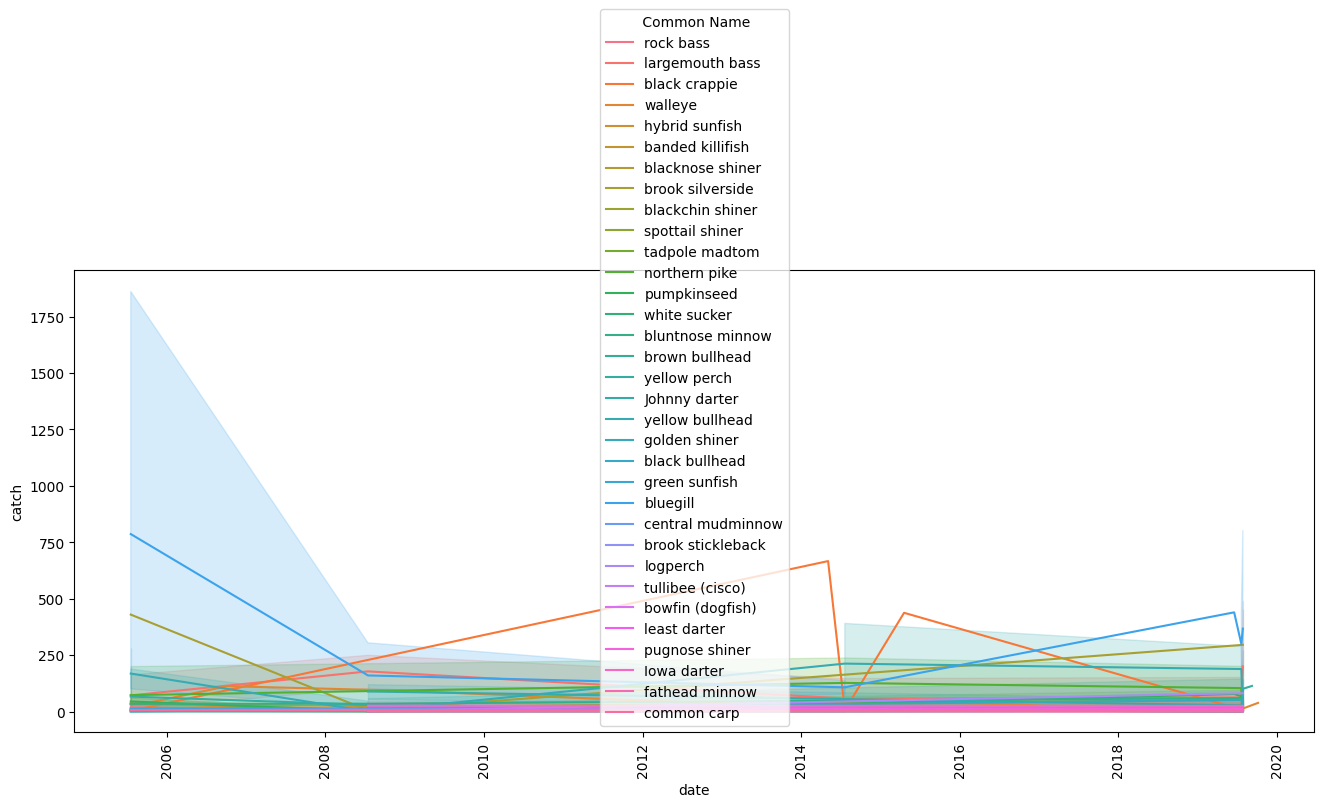

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)

sns.lineplot(
    data=species_df[species_df['date'] > datetime.datetime(2000, 1, 1)],
    x='date',
    y='catch',
    hue=' Common Name',
)